# Advanced preprocessing

## Morphological operations

Let's dive a bit deeper. 
In order to have clearer images, ready for further processing, we have to clean them. Indeed, there is some "recurrent noise" in some images, the kind of noise that you often have to deal with.
It can be noise coming from bad quality scanners or the ones that you find on old paper, and many more...

To fix that, openCV has a bunch of methods that are very handy. 

Take the time [to read this](https://docs.opencv.org/master/d9/d61/tutorial_py_morphological_ops.html), you will need it!

## Image thresholding

Another hot topic in image preprocessing is image thresholding, which is basically deciding if a pixel should be white or black to remove the noise.
[Here is the official documentation](https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html) about it.
And [a well made article about it](https://medium.com/spinor/a-straightforward-introduction-to-image-thresholding-using-python-f1c085f02d5e).
Take the time to read both, they are super useful.

## Practice time
Now that you start to see how powerful openCV is, let's take a concrete example.
You want to detect the most recurrent words in a book. You scan the entire book and you end with pictures like that:

<img src="./assets/book_original.jpg" height="800" />

Play with openCV and try to get something like that:

<img src="./assets/book_clean.jpg" height="800" />

It doesn't have to be perfect, the goal here is **to learn how to use opencv**. You **don't need to care about the result**!

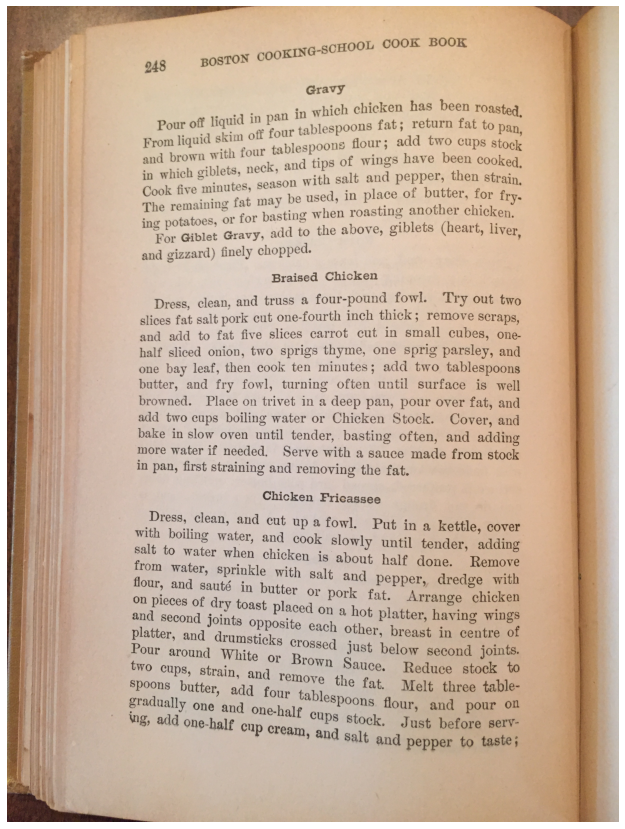

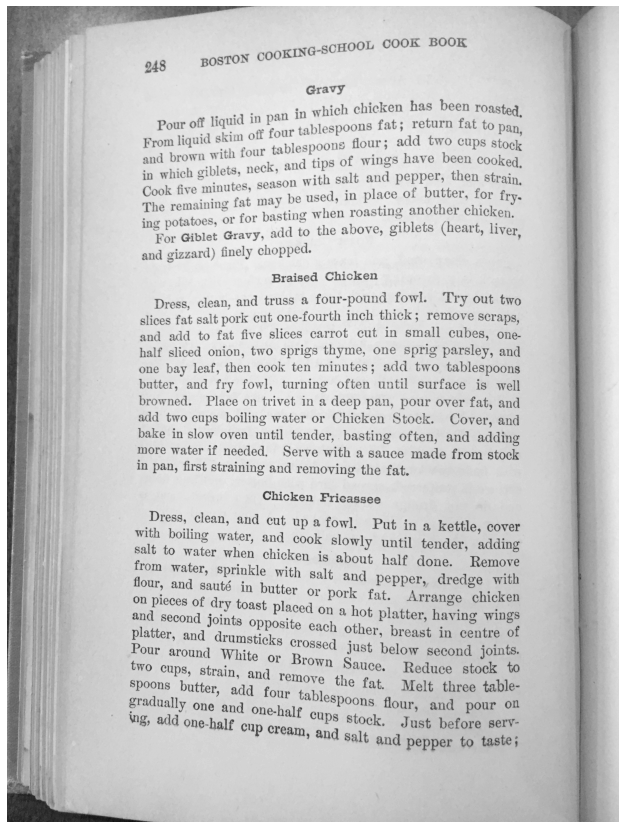

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Change display image size in notebook with matplotlib
# ( https://www.mikulskibartosz.name/how-to-change-plot-size-in-jupyter-notebook/ ) 
plt.rcParams["figure.figsize"] = (25,15)

# Open the colored image with openCV 
# WARNING: openCV works with the BGR(blue, green, red) color map, whereas pyplot works with RGB
img_BGR = cv2.imread('assets/book_original.jpg', cv2.IMREAD_COLOR)
img_RGB = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)

#We can additionally convert it to grayscale
img_GRAYSCALE =  cv2.cvtColor(img_BGR, cv2.COLOR_BGR2GRAY)


# Display the image with openCV in notebook
# In color
plt.figure()
plt.axis('off')
plt.imshow(img_RGB)

# In gray
plt.figure()
plt.axis('off')
plt.imshow(img_GRAYSCALE, cmap='gray') # cmap='gray' is necessary to render it as a grayscale image

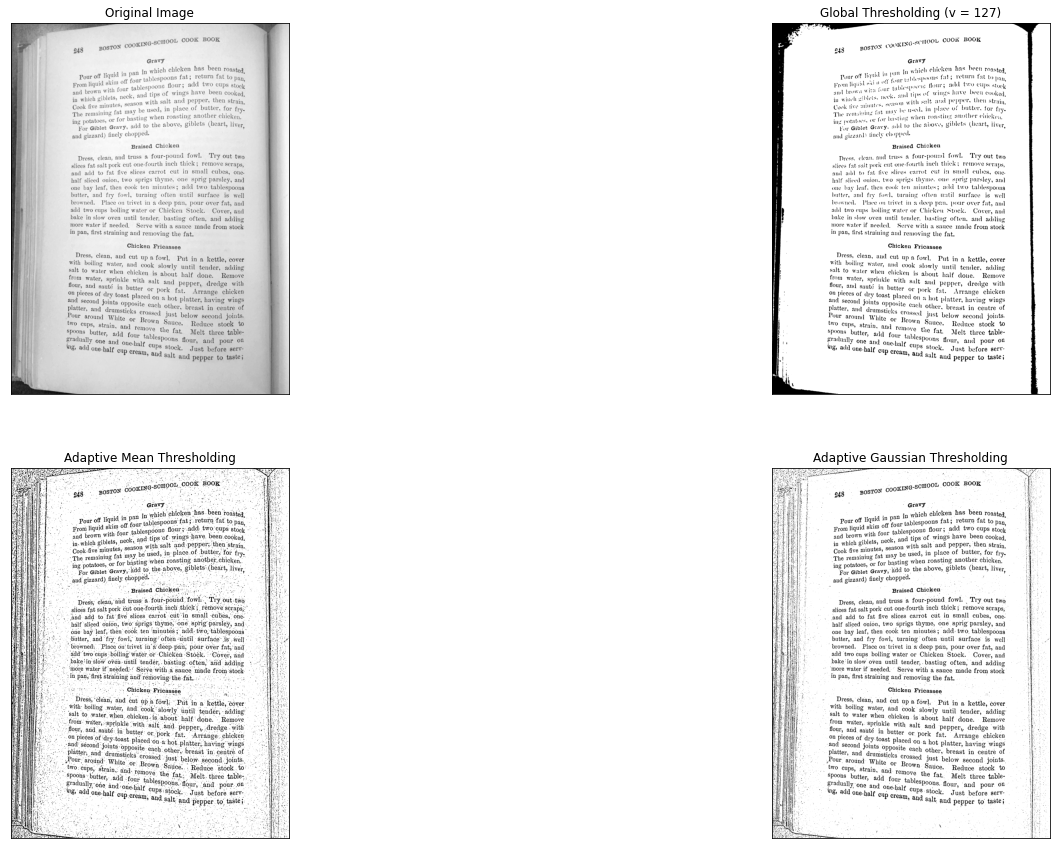

In [3]:
# Clean the image now!


import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('assets/book_original.jpg',0)
img = cv.medianBlur(img,5)
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()



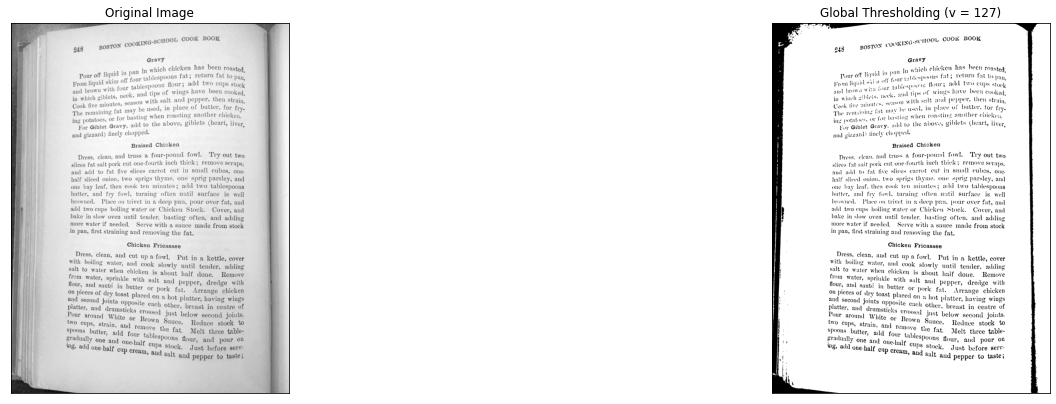

In [4]:
# Clean the image now!


import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('assets/book_original.jpg',0)
img = cv.medianBlur(img,5)
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
titles = ['Original Image', 'Global Thresholding (v = 127)']
images = [img, th1]
for i in range(2):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()




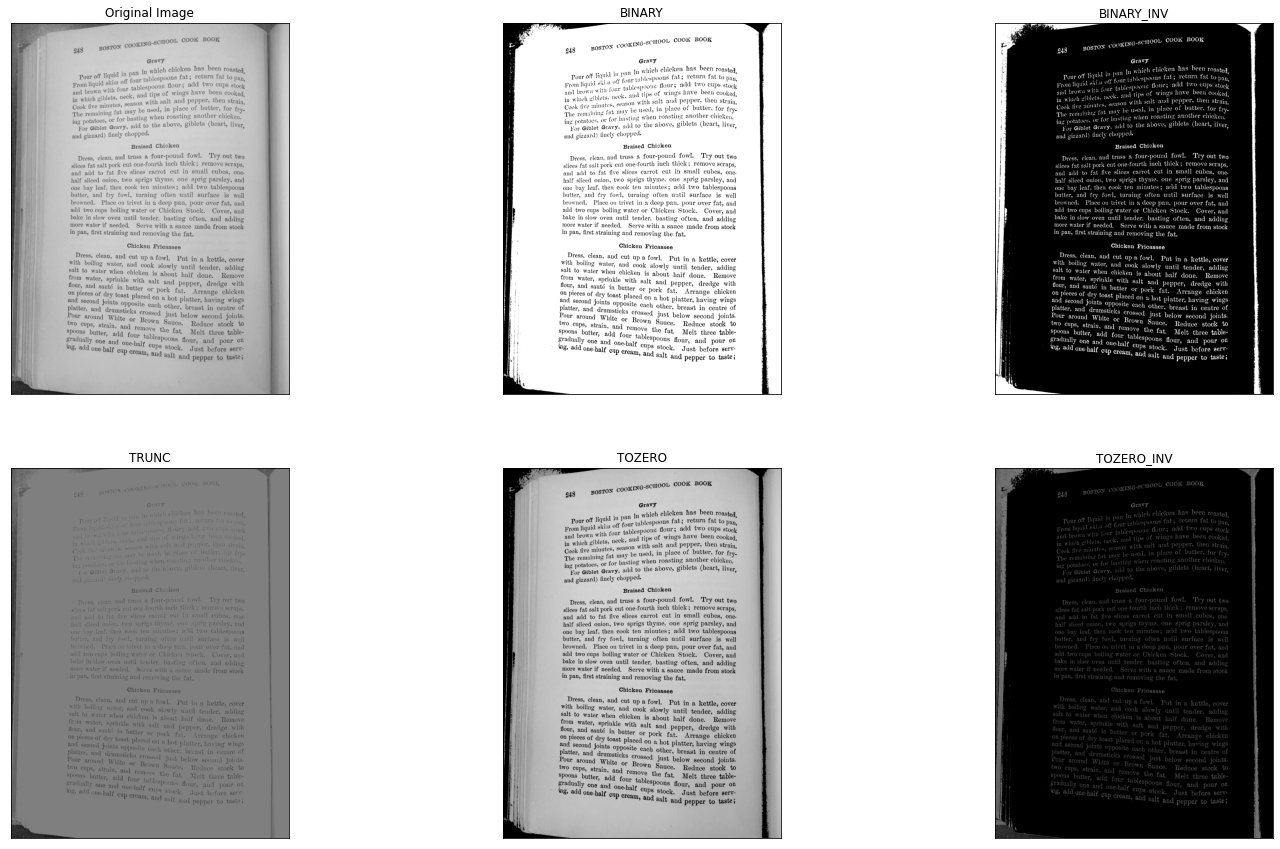

In [5]:
# Clean the image now!

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('assets/book_original.jpg',0)
ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

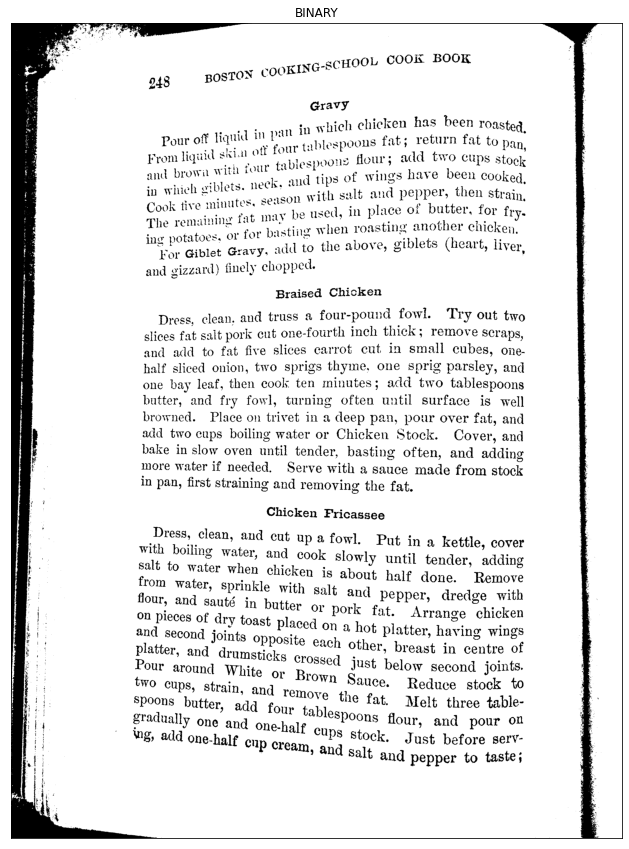

In [6]:
# Clean the image now!

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('assets/book_original.jpg',0)
ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
titles = ['BINARY']
images = [thresh1]
plt.imshow(thresh1,'gray',vmin=0,vmax=255)
plt.title('BINARY')
plt.xticks([]),plt.yticks([])
plt.show()

In [7]:
# Filename
filename = 'savedImage.jpg'
  
# Using cv2.imwrite() method
# Saving the image
cv2.imwrite(filename, thresh1)

True

How to install pytesseract:  

https://stackoverflow.com/questions/50951955/pytesseract-tesseractnotfound-error-tesseract-is-not-installed-or-its-not-i

In [8]:
import cv2
import pytesseract

In [10]:
img = cv2.imread('savedImage.jpg')
#img = cv2.resize(img, (600, 450))
#text = pytesseract.image_to_string(img)
#print(text)

In [12]:
img = cv2.imread('savedImage.jpg', 0)   # '0' = read the image as grayscale
text= pytesseract.image_to_string(img)
print(text)

TesseractNotFoundError: tesseract is not installed or it's not in your PATH. See README file for more information.